In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import sklearn as sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Spatial

In [3]:
# Load Dataset, Apply PCA and Create PCs

# Create DataFrame
df = pd.read_csv('upwelling_spatial.csv')
df = df.drop(columns = ['date (string)'])
df = df.dropna()

# Normalise the DataFrame
df2 = df.drop('upwelling3day', axis = 1)

df2_mean = df2.mean()
df2_stdev = df2.std()
df2_norm = (df2 - df2_mean) / df2_stdev

target = df['upwelling3day']

In [4]:
# Apply PCA
pca = PCA(n_components = 8)
df2_PC = pca.fit_transform(df2_norm)

# Number of Upwelling Events and No Upwelling Events
upwelling = df['upwelling3day']
Upwelling1 = np.sum(upwelling == 1)
Upwelling0 = np.sum(upwelling == 0)

print('There are', Upwelling1, 'instances of Upwelling')
print('There are', Upwelling0, 'instances of No Upwelling')

There are 11513 instances of Upwelling
There are 126359 instances of No Upwelling


In [5]:
# Create Training and Test Sets  
data_train, data_test, target_train, target_test = train_test_split(df2_PC, target, test_size = 0.20, random_state = 0, shuffle = True)

In [6]:
#4 Performing a Logistic Regression on a Training Set
log_reg = LogisticRegression()
log_reg.fit(data_train, target_train)

LogisticRegression()

In [7]:
# Apply Regression to Test Set
target_pred_test = log_reg.predict(data_test)

In [8]:
# Compute the Accuracy of the Training and Test Set
target_pred_train = log_reg.predict(data_train)

accuracy_test = metrics.accuracy_score(target_test, target_pred_test)
accuracy_train = metrics.accuracy_score(target_train, target_pred_train)

print("Accuracy of Test Data:", accuracy_test)
print("Accuracy of Training Data:",accuracy_train)

Accuracy of Test Data: 0.9144877606527652
Accuracy of Training Data: 0.9152832805969338


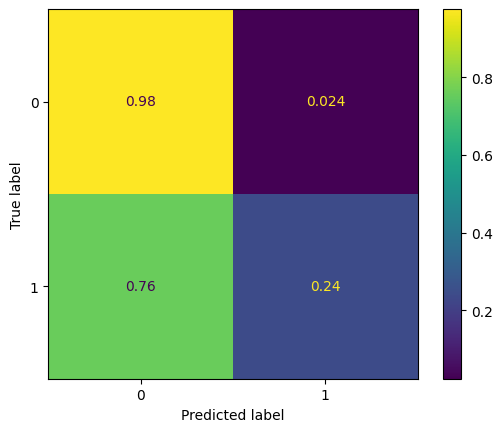

In [9]:
# Create confusion matrix
_ = metrics.ConfusionMatrixDisplay.from_estimator(log_reg, data_test, target_test, normalize = 'true')

In [10]:
# Apply Regression to Entire Dataset
df2_ = pd.DataFrame(df2_PC)
probs = log_reg.predict_proba(df2_)
probs_df = pd.DataFrame(probs, columns = ["No Upwelling Probability", "Upwelling Probability"])
df_full = pd.concat([df, probs_df], axis = 1)
corr_matrix = df_full.corr()
corr_matrix.style.background_gradient(cmap = 'Blues')

,date (float),latitude,longitude,ekman_upwelling,wind_u,wind_v,sst,wind_speed,sst_diff,sst_decrease,upwelling1day,upwelling3day,No Upwelling Probability,Upwelling Probability
date (float),1.000000,-0.000000,-0.000000,0.043540,0.053956,0.010229,0.049906,0.014493,-0.001532,-0.014443,0.029314,0.039119,0.030967,-0.030967
latitude,-0.000000,1.000000,-0.000000,-0.043138,0.120360,0.094109,-0.239279,-0.085298,0.002926,-0.158846,-0.159214,-0.117803,0.237492,-0.237492
longitude,-0.000000,-0.000000,1.000000,-0.371110,0.140071,-0.027590,0.088283,0.011545,-0.000784,-0.138683,-0.089702,-0.031734,0.037737,-0.037737
ekman_upwelling,0.043540,-0.043138,-0.371110,1.000000,-0.042846,-0.103271,0.012217,0.114468,0.001214,0.055544,0.097361,0.064854,-0.026869,0.026869
wind_u,0.053956,0.120360,0.140071,-0.042846,1.000000,-0.251071,0.104186,0.264994,-0.059198,-0.060544,0.275173,0.170881,0.034681,-0.034681
wind_v,0.010229,0.094109,-0.027590,-0.103271,-0.251071,1.000000,-0.085797,-0.688231,0.076794,-0.046298,-0.373355,-0.229352,0.030045,-0.030045
sst,0.049906,-0.239279,0.088283,0.012217,0.104186,-0.085797,1.000000,0.052480,0.056453,-0.133130,-0.017336,0.027786,-0.055434,0.055434
wind_speed,0.014493,-0.085298,0.011545,0.114468,0.264994,-0.688231,0.052480,1.000000,-0.082773,0.041573,0.284045,0.190776,-0.029792,0.029792
sst_diff,-0.001532,0.002926,-0.000784,0.001214,-0.059198,0.076794,0.056453,-0.082773,1.000000,-0.642239,-0.395465,-0.234020,0.000843,-0.000843
sst_decrease,-0.014443,-0.158846,-0.138683,0.055544,-0.060544,-0.046298,-0.133130,0.041573,-0.642239,1.000000,0.567387,0.323220,-0.040685,0.040685


# Non-spatial

In [12]:
# Load Dataset, Apply PCA and Create PCs

# Create DataFrame
df1 = pd.read_csv('upwelling_nonspatial.csv')
df1 = df1.drop(columns = ['date (string)'])
df1 = df1.dropna()

# Normalise the DataFrame
df3 = df1.drop('upwelling3day', axis = 1)

df3_mean = df3.mean()
df3_stdev = df3.std()
df3_norm = (df3 - df3_mean) / df3_stdev

target1 = df1['upwelling3day']

In [13]:
# Apply PCA
pca = PCA(n_components = 8)
df4_PC = pca.fit_transform(df3_norm)

# Number of Upwelling Events and No Upwelling Events
upwelling_ = df1['upwelling3day']
Upwelling1_ = np.sum(upwelling == 1)
Upwelling0_ = np.sum(upwelling == 0)

print('There are', Upwelling1_, 'instances of Upwelling')
print('There are', Upwelling0_, 'instances of No Upwelling')

There are 11513 instances of Upwelling
There are 126359 instances of No Upwelling


In [14]:
# Create Training and Test Sets  
data_train1, data_test1, target_train1, target_test1 = train_test_split(df4_PC, target1, test_size = 0.20, random_state = 0, shuffle = True)

In [15]:
# Performing a Logistic Regression on a Training Set
log_reg1 = LogisticRegression()
log_reg1.fit(data_train1, target_train1)

LogisticRegression()

In [16]:
# Apply Regression to Test Set
target_pred_test1 = log_reg1.predict(data_test1)

In [17]:
# Compute the Accuracy of the Training and Test Set
target_pred_train1 = log_reg1.predict(data_train1)

accuracy_test1 = metrics.accuracy_score(target_test1, target_pred_test1)
accuracy_train1 = metrics.accuracy_score(target_train1, target_pred_train1)

print("Accuracy of Test Data:", accuracy_test1)
print("Accuracy of Training Data:",accuracy_train1)

Accuracy of Test Data: 0.8704453441295547
Accuracy of Training Data: 0.8915906788247214


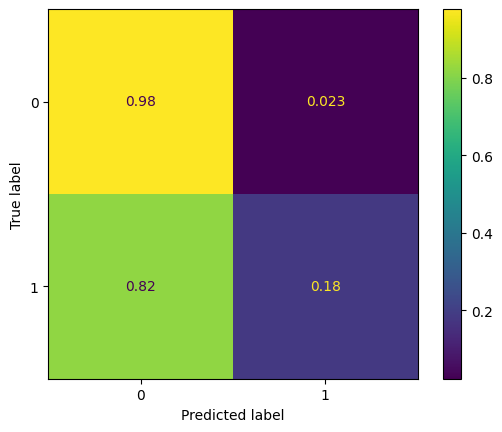

In [18]:
# Create confusion matric
__ = metrics.ConfusionMatrixDisplay.from_estimator(log_reg1, data_test1, target_test1, normalize = 'true')

In [19]:
# Apply Regression to Entire Dataset
df4_ = pd.DataFrame(df4_PC)
probs1 = log_reg1.predict_proba(df2_)
probs_df1 = pd.DataFrame(probs, columns = ["No Upwelling Probability", "Upwelling Probability"])
df_full1 = pd.concat([df1, probs_df1], axis = 1)
corr_matrix1 = df_full1.corr()
corr_matrix1.style.background_gradient(cmap = 'Blues')

/opt/anaconda3/lib/python3.12/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/anaconda3/lib/python3.12/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,date (float),latitude,longitude,ekman_upwelling,wind_u,wind_v,sst,wind_speed,sst_diff,sst_decrease,upwelling1day,upwelling3day,No Upwelling Probability,Upwelling Probability
date (float),1.000000,nan,nan,0.015857,0.081751,-0.066931,0.113688,0.025812,0.001412,-0.008726,0.032114,0.053308,-0.076484,0.076484
latitude,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
longitude,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ekman_upwelling,0.015857,nan,nan,1.000000,0.025269,-0.150429,0.017701,0.085476,-0.019960,0.057990,0.087436,0.028168,0.052092,-0.052092
wind_u,0.081751,nan,nan,0.025269,1.000000,-0.474860,-0.014039,0.305655,-0.032105,0.056316,0.384344,0.248892,-0.080976,0.080976
wind_v,-0.066931,nan,nan,-0.150429,-0.474860,1.000000,-0.003223,-0.395494,0.097968,-0.133586,-0.548759,-0.349150,0.073353,-0.073353
sst,0.113688,nan,nan,0.017701,-0.014039,-0.003223,1.000000,-0.146201,0.053222,-0.017503,0.014509,0.007509,-0.002575,0.002575
wind_speed,0.025812,nan,nan,0.085476,0.305655,-0.395494,-0.146201,1.000000,-0.170419,0.165415,0.444065,0.308253,-0.127622,0.127622
sst_diff,0.001412,nan,nan,-0.019960,-0.032105,0.097968,0.053222,-0.170419,1.000000,-0.690075,-0.428778,-0.266587,0.088126,-0.088126
sst_decrease,-0.008726,nan,nan,0.057990,0.056316,-0.133586,-0.017503,0.165415,-0.690075,1.000000,0.604672,0.362776,-0.066483,0.066483
